# **Homework 6 (30 points)**

#### **Dylan Watson**


As part of this assignment, I would like you to complete Task 4 of the project.

<br>

---

<br>

Please follow the directions below carefully:

- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Comment all code using the `#`. This is a must!
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed project must be submitted to Canvas as a .ipynb file by the assigned due date**



<br>

---

<br>






In [1]:
install.packages("ggplot2")

Installing package into 'C:/Users/dylan/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.5.1  3.5.2             FALSE



installing the source package 'ggplot2'




## Data

Data for the project is available [here](https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv). A data dictionary describing the meaning of each of the variables in the dataset is available in the Project module in Canvas.

In [2]:
url = "https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv"
copd = read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv")
dat1 = na.omit(copd)
head(dat1)

,sid,visit_year,visit_date,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,⋯,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC,FEV1_phase2
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,Female,White,159.9,73.0,130,80,⋯,5.6636,0.926851,2.4766,6.80077,-830.343,-650.526,0.77,2.921,3.805,2.622
3,10010J,2008,1/15/2008,65.9,Female,White,162.1,62.8,96,63,⋯,5.1960,1.683760,3.8993,41.34930,-833.429,-789.595,0.53,1.008,1.909,1.087
4,10015T,2008,2/15/2008,59.6,Male,White,182.9,110.0,142,88,⋯,6.3971,9.330450,-1.0000,-1.00000,-841.315,-1.000,0.51,1.906,3.732,2.002
5,10017X,2008,6/15/2008,67.5,Male,White,179.1,83.0,106,72,⋯,7.8935,36.262400,4.1043,46.17690,-887.947,-792.397,0.57,2.748,4.827,2.178
6,10022Q,2008,2/15/2008,69.8,Female,White,158.8,78.0,122,78,⋯,5.1016,30.484400,-1.0000,-1.00000,-865.608,-1.000,0.53,1.076,2.047,0.924
7,10025W,2008,2/15/2008,68.9,Male,Black or African American,168.9,51.0,120,60,⋯,6.4421,51.156200,-1.0000,-1.00000,-906.021,-1.000,0.27,0.718,2.697,0.596


<br>

---

<br>






## Introduction

Chronic obstructive pulmonary disease (COPD) affects over 16 million Americans and is the fourth leading cause of death in the United States behind heart disease, cancer, and accidental death. While COPD can result from various toxic inhalations or asthma, it is most commonly associated with cigarette smoking.

<br>

COPD severity is typically measured by a device called a spirometer. Patients forcefully exhale into the device and the volume of air exhaled is used as a measure for the severity of disease (less air exhaled $\Rightarrow$ worse disease). Data collected by the COPDGene research group includes spirometry data on thousands of research participants.

<br>

Spirometry measures in the dataset:
* The forced expiratory volume (`FEV1`) is the volume of air exhaled in 1 second
* The forced vital capacity (`FVC`) is the total volume of air exhaled after a full breath
* `FEV1_FVC_ratio` is the ratio between `FEV1` and `FVC` (smaller $\Rightarrow$ worse disease)
* `FEV1_phase2` is the `FEV1` of research participants 5 years later

<br>

You overall task in this project is to analyze the relationship between FEV1 at follow-up `FEV1_phase2` and other variables in the dataset. The project has been organized into a series of tasks to assist you with your analysis organization.

<br>

---

<br>






####<font color=red>Organized</font> (1 points)
* Answers should be organized in the following format for organization and readability

<br>

```
# 1.
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2.
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






####<font color=red>Task 1 (Task 4 of Project)</font> (9 points)

1. Using `dat1` from Task 1.1 of the project, create a boxplot to visualize the relationship between `FEV1_phase2` and `smoking_status`.
2. Based on the boxplot, which group tends to have better breathing capacity?
3. Select rows in `dat1` corresponding to a `smoking_status` of `Current smoker` or `Former smoker`. Create a 95% confidence interval to determine if average FEV1 is different between current or former smokers. Explain your answer in complete sentences.

Note that `dat1` has the NAs omitted from the variable `FEV1_phase2` as instructed in Task 1.1 of the project.

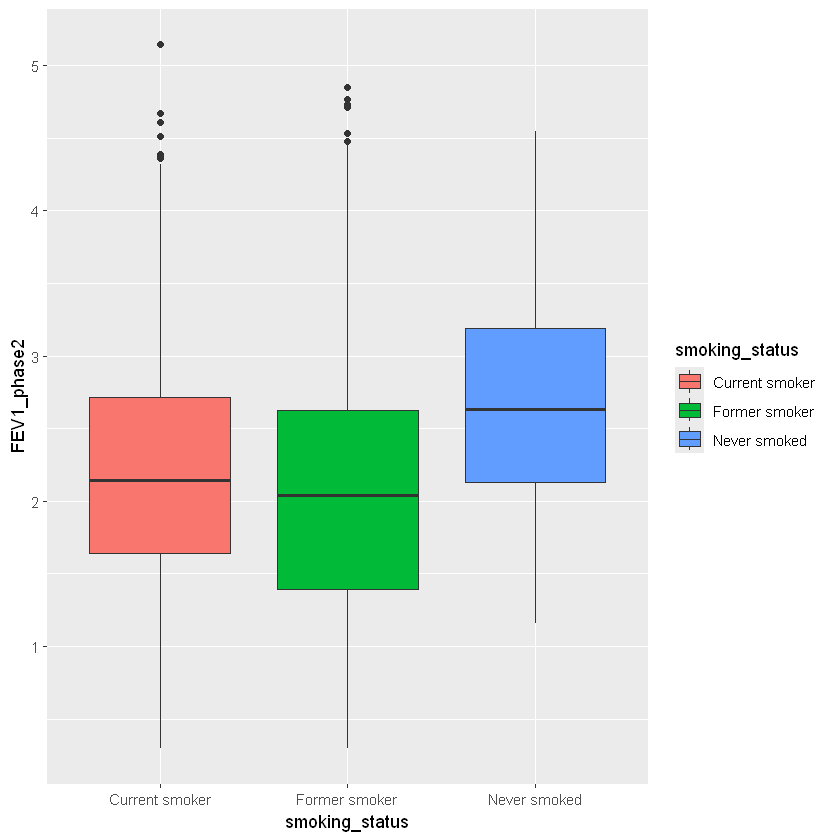

In [3]:
library(ggplot2)

ggplot(data = dat1, mapping = aes(x = smoking_status, y = FEV1_phase2, fill = smoking_status) ) +
       geom_boxplot()

Looking at the boxplot of forced expiratory volume at the 5 year follow-up we see volume measurements at 3 different factor levels. The group with by far the greatest FEV1_phase2 is the never smoked factor at a mean value of ~2.6. This should be obvious as smoking has negative impacts on cardiovascular health. Both current smoker and former smoker lag behind in FEV1_phase2 volume at around ~2-2.2. Interestingly, one might expect former smokers to have greater expiratory volume as their lungs recover from the damage done by smoking when compared to current smokers. However, I theorize that former smokers are likely much greater in age than current smokers and thus have already suffered permanent long term health impacts that current smokers are still undergoing. When controlled by age, we may see different results in these two categories. 

<br>

---

<br>






####<font color=red>Task 2</font> (5 points)

1. Find a visualization online that interests. The visualization must include multiple dimensions of data (e.g., scatterplot with shape, color, annotation or maps with shape, color, annotation etc.). Paste the link in a text box.
2. Describe why the visualization interests you in a paragraph comprising complete sentences. Your answer should be in the context of the real-world application of the visualization.


<br>

---

<br>






####<font color=red>Task 3</font> (5 points)

1. Find a poor data visualization online. You can simply search "bad data visualization" in your browser. Paste the link in a text box.
2. Describe why the visualization is poor in complete sentences.


1. <br>
Link: https://www.oldstreetsolutions.com/good-and-bad-data-visualization <br>
(The first pie chart of emojis) <br>
2. <br>
This pie chart appears to be a chart of the relative usage of emojis each represented as a percent of total emoji usage. However, this visualization of the data is poor. There are so many emojis listed that is is impossible to tell what a majority of the emojis are. Maybe it would be useful to combine emojis into broader categories to reduce the total number of categories in the pie chart.

<br>

---

<br>






####<font color=red>Task 4</font> (10 points)

1. Include the visualization you created in class from the maps lecture (from the police killings dataset). The plot must include at least two dimensions (shapes, colors, size, text, etc).
2. Interpret your visualization using all of the dimensions you included in the graph.


In [4]:
install.packages("maps")
install.packages("mapproj")
# Could not install packages?

Installing package into 'C:/Users/dylan/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
      binary source needs_compilation
maps 3.4.2.1  3.4.3              TRUE

  Binaries will be installed
package 'maps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dylan\AppData\Local\Temp\RtmpkHHEKR\downloaded_packages


Installing package into 'C:/Users/dylan/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
        binary source needs_compilation
mapproj 1.2.11 1.2.12              TRUE

  Binaries will be installed
package 'mapproj' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dylan\AppData\Local\Temp\RtmpkHHEKR\downloaded_packages


In [5]:
library(mapproj)
library(maps)

Loading required package: maps

